<a href="https://colab.research.google.com/github/NikolaevaEV/PDA_SOL/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [181]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [182]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [183]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [184]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [186]:
df.isnull().values.any()

False

In [187]:
print (df.columns[df.eq(0).any()])

Index(['capital.gain', 'capital.loss'], dtype='object')


In [188]:
print ((df == 0).sum())

age                   0
workclass             0
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
native.country        0
income                0
dtype: int64


In [189]:
print (((df == 0).sum()) / len(df) * 100)

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
education.num      0.000000
marital.status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
sex                0.000000
capital.gain      91.671017
capital.loss      95.334910
hours.per.week     0.000000
native.country     0.000000
income             0.000000
dtype: float64


In [190]:
print (df.columns[df.isin([' ?']).any()])

Index(['workclass', 'occupation', 'native.country'], dtype='object')


In [191]:
print ((df == ' ?').sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [192]:
print (((df == ' ?').sum()) / len(df) * 100)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:
1. Ошибки при сборе данных.
2. Частичная потеря или повреждение информации при обработке или хранении.
3. Отсутствие наиболее подходящего ответа по мнению респондента.
4. Нежелание респондента указывать некоторую информацию о себе.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [193]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [194]:
df.groupby("sex").age.mean().round()

sex
 Female    37.0
 Male      39.0
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

In [195]:
import matplotlib.pyplot as plt

In [196]:
ed_data = df['education'].value_counts()

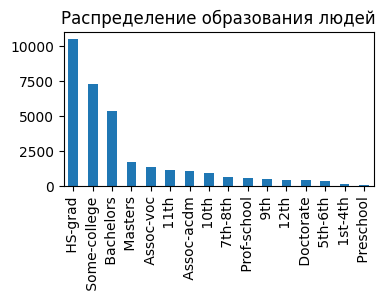

In [197]:
plt.figure(figsize=(4, 2))
ed_data.plot(kind='bar')
plt.title('Распределение образования людей')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [198]:
mean_more_50k = df[df['income'] == ' >50K']['age'].mean().round()
mean_less_50k = df[df['income'] == ' <=50K']['age'].mean().round()

print("Ср. возраст (более 50K в год): ", mean_more_50k)
print("Ср. возраст (менее 50K в год): ", mean_less_50k)

Ср. возраст (более 50K в год):  44.0
Ср. возраст (менее 50K в год):  37.0


In [199]:
std_more_50k = df[df['income'] == ' >50K']['age'].std().round()
std_less_50k = df[df['income'] == ' <=50K']['age'].std().round()

print("Ст. откл. возраста (более 50K в год) :", std_more_50k)
print("Ст. откл. возраста (менее 50K в год) :", std_less_50k)

Ст. откл. возраста (более 50K в год) : 11.0
Ст. откл. возраста (менее 50K в год) : 14.0


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [200]:
high_ed = df[df['income'] == ' >50K']

In [201]:
min_high_ed = high_ed['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']).all()

if min_high_ed:
    print("Правда")
else:
    print("Неправда")

Неправда


In [202]:
print (df.groupby('education')['income'].apply (lambda x: (x==' >50K'). sum ()))

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Preschool          0
 Prof-school      423
 Some-college    1387
Name: income, dtype: int64


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [203]:
male = df[df['sex'] == ' Male']
married_men = df[df['marital.status'].str.startswith(' Married')]
single_men = df[~df['marital.status'].str.startswith(' Married')]

In [204]:
hi_married = (married_men['income'] == ' >50K').mean()
hi_single = (single_men['income'] == ' >50K').mean()

In [205]:
if hi_married > hi_single:
    print("Среди женатых мужчин доля зарабатывающих >50K больше.")
elif hi_married < hi_single:
    print("Среди холостых мужчин доля зарабатывающих >50K больше.")
else:
    print("Доли зарабатывающих >50K среди женатых и холостых мужчин равны.")

Среди женатых мужчин доля зарабатывающих >50K больше.


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [206]:
group_native_country = df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()
group_native_country

income,<=50K,>50K
native.country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [207]:
df['capital.diff'] = df['capital.gain'] - df['capital.loss']

In [208]:
def create_range(diff):
    if diff < 0:
        return "Loss"
    elif diff == 0:
        return "No Gain/Loss"
    elif 0 < diff <= 1000:
        return "Low Gain"
    elif 1000 < diff <= 5000:
        return "Medium Gain"
    else:
        return "High Gain"

In [209]:
df['capital.diff.range'] = df['capital.diff'].apply(create_range)

In [210]:
pd.crosstab(df['education'], df['capital.diff.range'])

capital.diff.range,High Gain,Loss,Low Gain,Medium Gain,No Gain/Loss
education,,,,,
10th,10,28,2,28,865
11th,21,33,5,27,1089
12th,8,8,3,11,403
1st-4th,1,4,0,4,159
5th-6th,5,11,0,9,308
7th-8th,8,23,0,33,582
9th,3,9,4,24,474
Assoc-acdm,49,55,0,33,930
Assoc-voc,71,54,2,61,1194


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [215]:
a = {}
for i in df['native.country'].unique():
    b = df[(df['sex'] == 'Female') & (df['income'] == '>50K') & (df['native.country'] == i)].shape[0]
    a[i] = b
a = sorted(a.items(), key=lambda x: x[1], reverse=True)
print("Женщины из этих стран чаще получают в среднем зарплату >50K:")
for i, k in zip(a[:3], range(3)):
    print(i[0])

Женщины из этих стран чаще получают в среднем зарплату >50K:
 United-States
 Cuba
 Jamaica


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [212]:
import numpy as np

In [213]:
def generate_magic_salary(row):
    if row['income'] == ' <=50K':
        return np.random.randint(0, 51)
    elif row['income'] == ' >50K':
        return np.random.randint(51, 201)
    else:
        return np.nan

df['magic_salary'] = df.apply(generate_magic_salary, axis=1)

In [214]:
mean_salary = df.groupby('education')['magic_salary'].mean()
mean_salary

education
 10th            31.965702
 11th            29.999149
 12th            33.376443
 1st-4th         30.148810
 5th-6th         28.984985
 7th-8th         30.585139
 9th             30.247082
 Assoc-acdm      51.557638
 Assoc-voc       52.467438
 Bachelors       66.080859
 Doctorate       98.106538
 HS-grad         41.183982
 Masters         80.466048
 Preschool       22.588235
 Prof-school     97.513889
 Some-college    44.245097
Name: magic_salary, dtype: float64